<a href="https://colab.research.google.com/github/amzad-786githumb/Data_Analytics-R/blob/main/Inferential_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>LAB-1: Foundations for inference - Sampling distributions</h1>

<h2>Load packages</h2>

In [1]:
install.packages("dplyr")
install.packages("ggplot2")
install.packages("statsr")
install.packages("grid")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘elliptic’, ‘contfrac’, ‘deSolve’, ‘coda’, ‘pbapply’, ‘mvtnorm’, ‘MatrixModels’, ‘hypergeo’, ‘RcppEigen’, ‘BayesFactor’, ‘gridExtra’, ‘cubature’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘grid’ is a base package, and should not be updated”


In [ ]:
library(dplyr)
library(ggplot2)
library(statsr)
library(grid)

<h2>Loading The data</h2>

In [ ]:
data(ames)

In [ ]:
head(ames)

Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,⋯,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
1,526301100,1656,215000,20,RL,141,31770,Pave,NA,⋯,0,0,NA,NA,NA,0,5,2010,WD,Normal
2,526350040,896,105000,20,RH,80,11622,Pave,NA,⋯,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
3,526351010,1329,172000,20,RL,81,14267,Pave,NA,⋯,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
4,526353030,2110,244000,20,RL,93,11160,Pave,NA,⋯,0,0,NA,NA,NA,0,4,2010,WD,Normal
5,527105010,1629,189900,60,RL,74,13830,Pave,NA,⋯,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
6,527105030,1604,195500,60,RL,78,9978,Pave,NA,⋯,0,0,NA,NA,NA,0,6,2010,WD,Normal


<p>We can explore the distribution of areas of homes in the population of home sales visually and with summary statistics. Let’s first create a visualization, a histogram:</p>

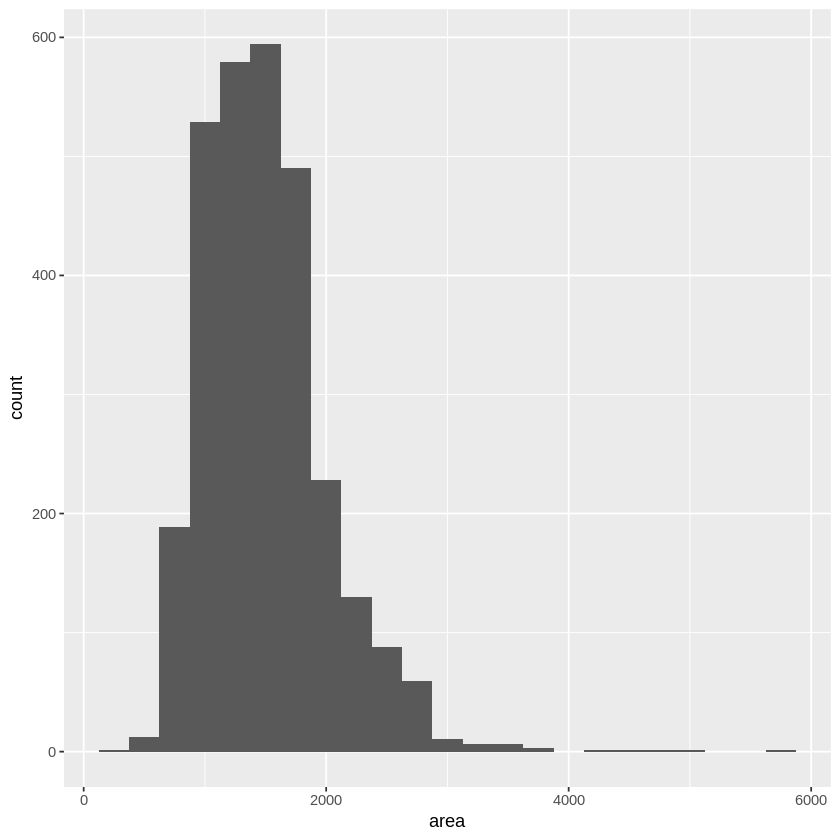

In [ ]:
ggplot(data=ames, aes(x=area)) +
  geom_histogram(binwidth = 250)

In [ ]:
#Let’s also obtain some summary statistics.

ames %>%
  summarise(mu = mean(area), pop_med=median(area),
            sigma = sd(area), pop_iqr = IQR(area),
            pop_min = min(area), pop_max = max(area),
            pop_q1 = quantile(area, 0.25),
            pop_q3 = quantile(area, 0.75))

mu,pop_med,sigma,pop_iqr,pop_min,pop_max,pop_q1,pop_q3
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1499.69,1442,505.5089,616.75,334,5642,1126,1742.75


<h2>The unknown sampling distribution</h2>

In [ ]:
#use the following command to survey the population

samp1 <- ames %>%
  sample_n(size = 50)

In [ ]:
samp1

Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,⋯,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
144,535153070,1194,148000,20,RL,73,8760,Pave,NA,⋯,0,0,NA,NA,NA,0,4,2010,WD,Normal
1668,527404100,950,119500,20,RL,61,9758,Pave,NA,⋯,0,0,NA,NA,NA,0,7,2007,WD,Normal
2297,923230120,796,138000,85,RL,50,6723,Pave,NA,⋯,0,0,NA,GdWo,NA,0,9,2007,WD,Normal
2183,908186050,1072,140000,180,RM,35,3675,Pave,NA,⋯,0,0,NA,NA,NA,0,5,2007,WD,Normal
1513,909100150,1292,108000,30,RL,67,5142,Pave,NA,⋯,0,0,NA,NA,NA,0,6,2008,WD,Normal
2187,908225310,1195,98500,90,RL,52,8741,Pave,NA,⋯,0,0,NA,GdWo,NA,0,7,2007,WD,Abnorml
1943,535353160,1544,138000,50,RL,60,14190,Pave,NA,⋯,0,0,NA,NA,NA,0,4,2007,WD,Normal
853,907200230,1040,124000,20,RL,60,8430,Pave,NA,⋯,0,0,NA,NA,NA,0,8,2009,WD,Normal
2452,528363070,2494,321000,60,RL,NA,10236,Pave,NA,⋯,0,0,NA,GdPrv,NA,0,6,2006,WD,Normal


<h4>Q1. Describe the distribution of this sample? How does it compare to the distribution of the population? Hint: sample_n function takes a random sample of observations (i.e. rows) from the dataset, you can still refer to the variables in the dataset with the same names. Code you used in the previous exercise will also be helpful for visualizing and summarizing the sample, however be careful to not label values mu and sigma anymore since these are sample statistics, not population parameters. You can customize the labels of any of the statistics to indicate that these come from the sample.</h4>

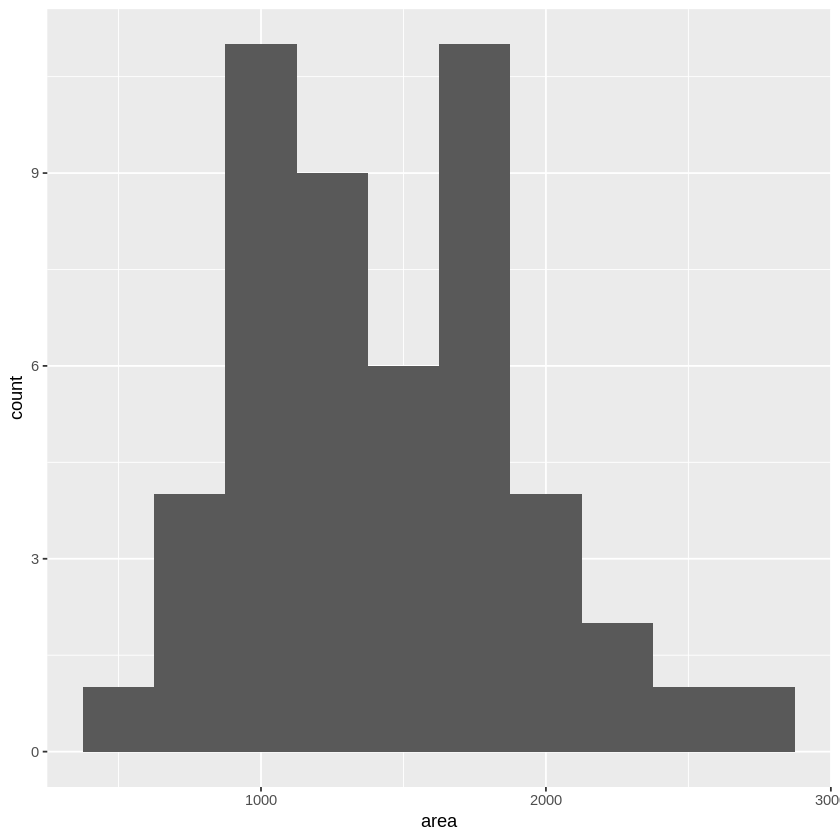

In [ ]:
ggplot(data=samp1, aes(x=area)) +
  geom_histogram(binwidth = 250)

In [ ]:
#our best single guess is the sample mean

samp1 %>%
  summarise(x_bar = mean(area))

x_bar
<dbl>
1430.28


<h4>Q2. Suppose we took two more samples, one of size 100 and one of size 1000. Which would you think would provide a more accurate estimate of the population mean?

A.Sample size of 50.
B.Sample size of 100.
C.Sample size of 1000.</h4>

In [ ]:
#Let’s take one more sample of size 50, and view the mean area in this sample:

ames %>%
  sample_n(size = 50) %>%
  summarise(x_bar = mean(area))

x_bar
<dbl>
1525


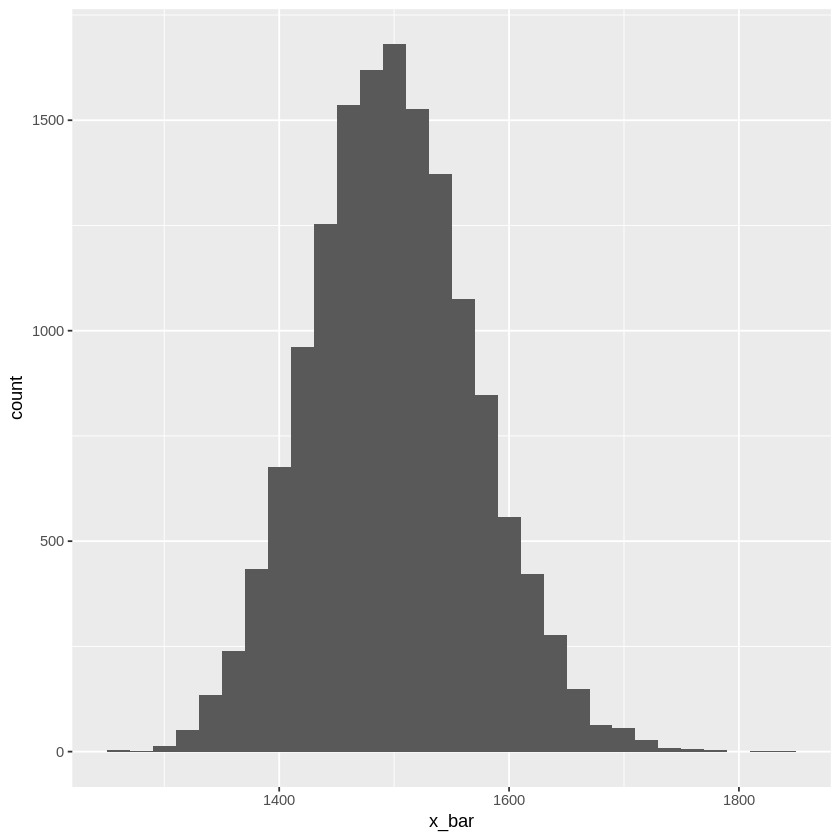

In [ ]:
sample_means50 <- ames %>%
                    rep_sample_n(size=50, reps=15000, replace=TRUE) %>%
                    summarise(x_bar=mean(area))

ggplot(data=sample_means50, aes(x=x_bar)) +
  geom_histogram(binwidth = 20)

<h4>Q3.How many elements are there in sample_means50? Describe the sampling distribution, and be sure to specifically note its center. Make sure to include a plot of the distribution in your answer.</h4>

In [ ]:
sample_means50 %>%
  summarise(mu = mean(x_bar), pop_med = median(x_bar),
            pop_min = min(x_bar), pop_max = max(x_bar),
            pop_q1 = quantile(x_bar, 0.25),
            pop_q3 = quantile(x_bar, 0.75))

mu,pop_med,pop_min,pop_max,pop_q1,pop_q3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1499.127,1497.22,1250.08,1838.36,1449.775,1545.925


<h2>Interlude: Sampling distributions</h2>

<p>The idea behind the rep_sample_n function is repetition. Earlier we took a single sample of size n (50) from the population of all houses in Ames. With this new function we are able to repeat this sampling procedure rep times in order to build a distribution of a series of sample statistics, which is called the sampling distribution.</p>

In [ ]:
ames %>%
  sample_n(size = 50) %>%
  summarise(x_bar = mean(area))

x_bar
<dbl>
1611.94


<h4>Q4. To make sure you understand how sampling distributions are built, and exactly what the sample_n and do function do, try modifying the code to create a sampling distribution of 25 sample means from samples of size 10, and put them in a data frame named sample_means_small. Print the output. How many observations are there in this object called sample_means_small? What does each observation represent?</h4>

In [ ]:
sample_means_small <- ames %>%
                      rep_sample_n(size=10,reps = 25, replace = TRUE) %>%
                      summarise(x_bar=mean(area))

In [ ]:
sample_means_small %>%
  summarise(n())

n()
<int>
25


<h2>Sample size and the sampling distribution</h2>

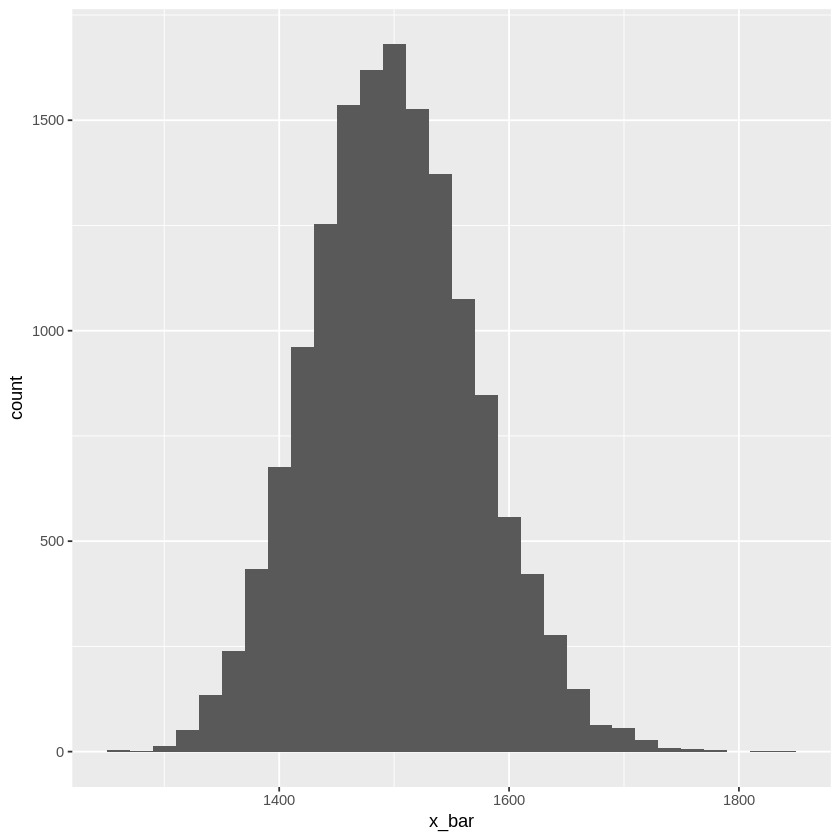

In [ ]:
ggplot(data = sample_means50, aes(x=x_bar)) +
  geom_histogram(binwidth = 20)

<h4>Q4. Take a random sample of size 50 from price. Using this sample, what is your best point estimate of the population mean?</h4>

In [ ]:
ames %>%
  sample_n(size=50) %>%
  summarise(x_bar = mean(price))

x_bar
<dbl>
179404


<h4>Q5. Since you have access to the population, simulate the sampling distribution for x¯price
 by taking 5000 samples from the population of size 50 and computing 5000 sample means. Store these means in a vector called sample_means50. Plot the data, then describe the shape of this sampling distribution. Based on this sampling distribution, what would you guess the mean home price of the population to be?</h5>

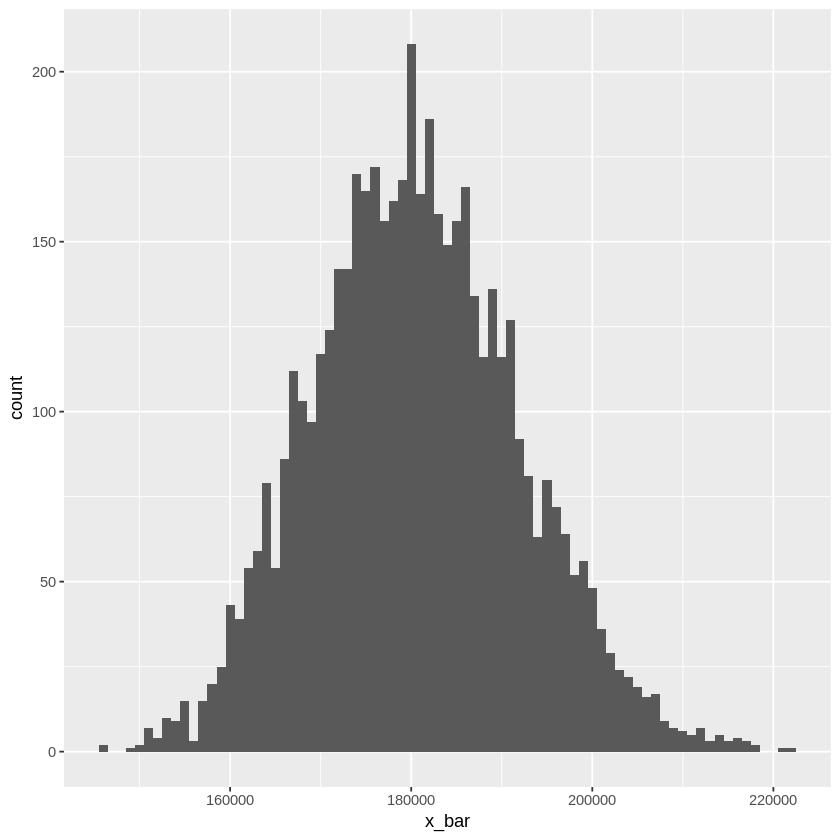

In [ ]:
sample_means50 <- ames %>%
  rep_sample_n(size = 50, reps = 5000, replace = TRUE) %>%
  summarise(x_bar = mean(price))

ggplot(data = sample_means50, aes(x = x_bar)) +
  geom_histogram(binwidth =1000)

<h4>Q6. Change your sample size from 50 to 150, then compute the sampling distribution using the same method as above, and store these means in a new vector called sample_means150. Describe the shape of this sampling distribution, and compare it to the sampling distribution for a sample size of 50. Based on this sampling distribution, what would you guess to be the mean sale price of homes in Ames?<h4>

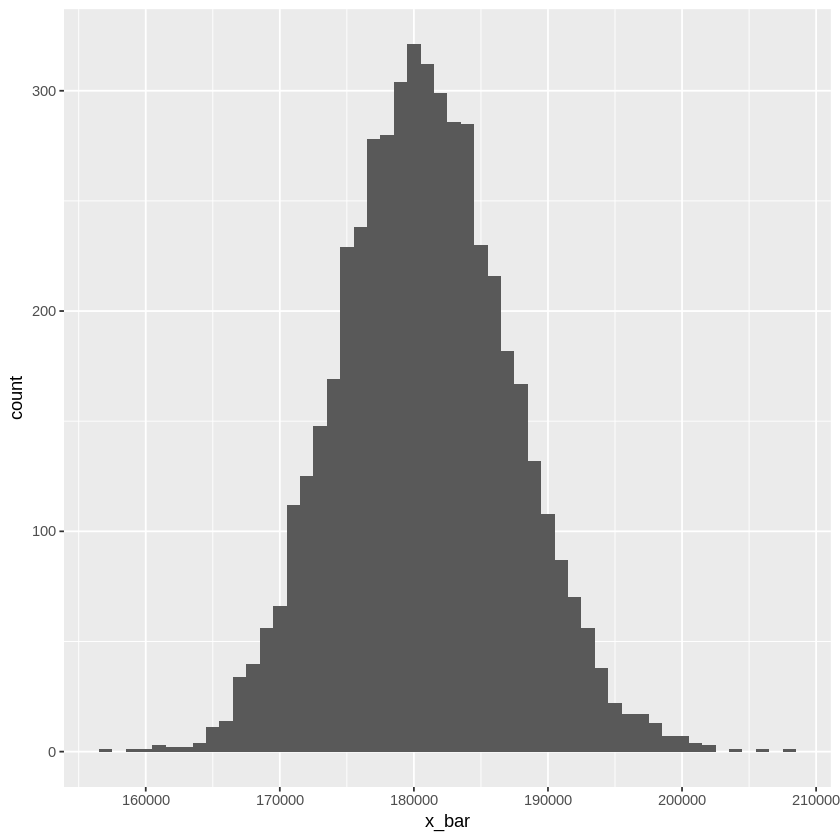

In [ ]:
sample_means150 <- ames %>%
  rep_sample_n(size = 150, reps = 5000, replace = TRUE) %>%
  summarise(x_bar= mean(price))

ggplot(data = sample_means150, aes(x=x_bar)) +
  geom_histogram(binwidth = 1000)

<h4>Q7. Take a sample of size 15 from the population and calculate the mean price of the homes in this sample. Using this sample, what is your best point estimate of the population mean of prices of homes?</h4>

In [ ]:
#best point estimate of the population mean of prices of homes

ames %>%
  sample_n(size = 1) %>%
  summarise(x_bar= mean(price))


x_bar
<dbl>
135000


<h4>Q8. Since you have access to the population, simulate the sampling distribution for x¯price
 by taking 2000 samples from the population of size 15 and computing 2000 sample means. Store these means in a vector called sample_means15. Plot the data, then describe the shape of this sampling distribution. Based on this sampling distribution, what would you guess the mean home price of the population to be? Finally, calculate and report the population mean.</h4>

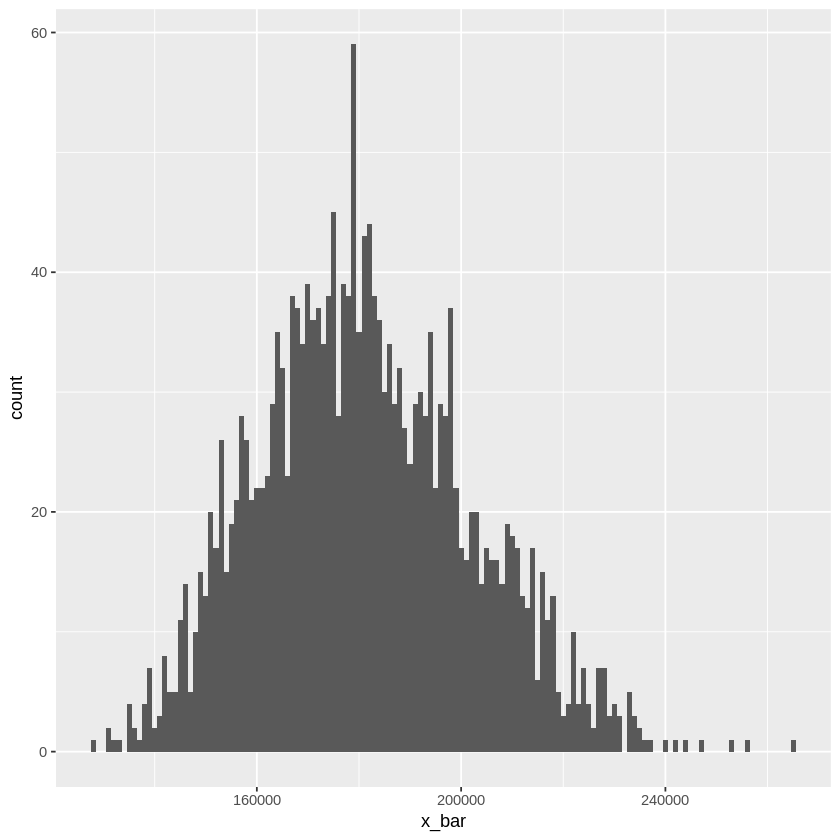

In [ ]:
sample_means15 <- ames %>%
  rep_sample_n(size = 15, reps = 2000, replace = TRUE) %>%
  summarise(x_bar= mean(price))

ggplot(data= sample_means15, aes(x=x_bar)) +
  geom_histogram(binwidth = 1000)

<h4>Q9. Change your sample size from 15 to 150, then compute the sampling distribution using the same method as above, and store these means in a new vector called sample_means150. Describe the shape of this sampling distribution, and compare it to the sampling distribution for a sample size of 15. Based on this sampling distribution, what would you guess to be the mean sale price of homes in Ames?</h4>

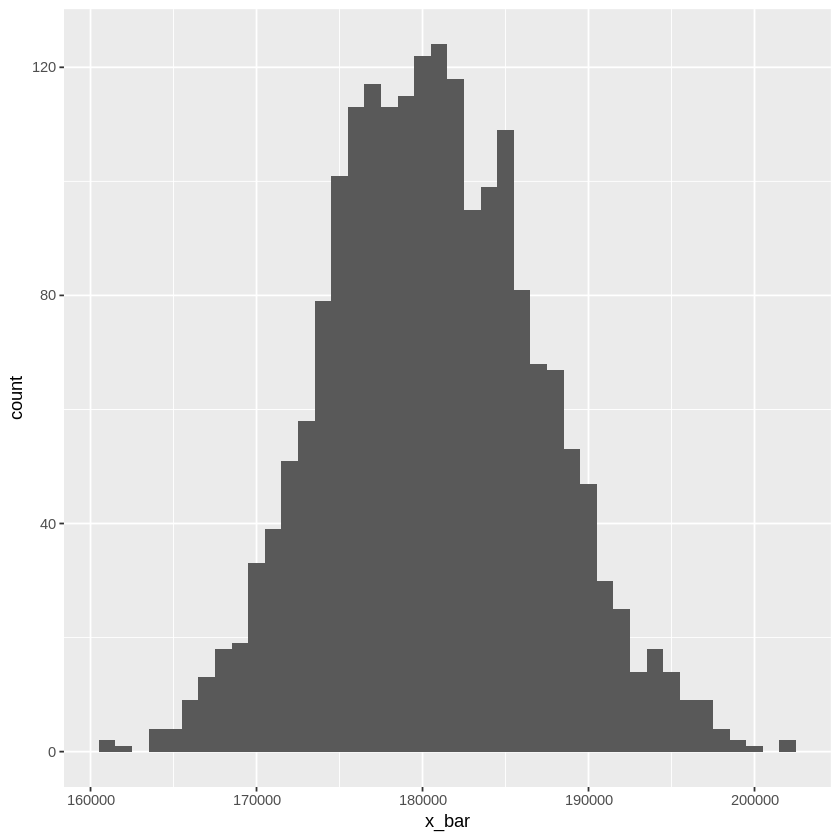

In [ ]:
# type your code for this Exercise here, and Run Document
sample_means150 <- ames %>%
                    rep_sample_n(size = 150, reps = 2000, replace = TRUE) %>%
                    summarise(x_bar = mean(price))

ggplot(data = sample_means150, aes(x = x_bar)) +
  geom_histogram(binwidth = 1000)

In [ ]:
sample_means50 %>%
    summarise(mu = mean(x_bar), pop_iqr = IQR(x_bar))

mu,pop_iqr
<dbl>,<dbl>
180567.6,15455.95


In [ ]:
sample_means150 %>%
    summarise(mu = mean(x_bar), pop_iqr = IQR(x_bar))

mu,pop_iqr
<dbl>,<dbl>
180643.7,8769.147


<h1>LAB-2: Foundations for inference - Confidence intervals<h1>

In [ ]:
# Set the random seed
set.seed(9102015)

<h2>Load packages<h2>

In [ ]:
library(statsr)
library(dplyr)
library(ggplot2)

<h2>Loading the data</h2>

In [ ]:
data(ames)

In [ ]:
#we’ll start with a simple random sample of size 60 from the population

n <- 60
samp <- sample_n(ames, n)

<h4>Q1. Describe the distribution of homes in your sample. What would you say is the “typical” size within your sample? Also state precisely what you interpreted “typical” to mean.<h4>

In [ ]:
samp %>%
  summarise(x_bar = mean(area), s = sd(area),
            med_samp = median(area),
            min_samp = min(area), max_samp = max(area),
            iqr_samp = IQR(area),
            q1_samp = quantile(area, 0.25),
            q3_samp = quantile(area, 0.75))

x_bar,s,med_samp,min_samp,max_samp,iqr_samp,q1_samp,q3_samp
<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1476.283,462.8179,1443.5,641,2713,634.25,1119.5,1753.75


<h2>Confidence intervals</h2>

<p>Based only on this single sample, the best estimate of the average living area of houses sold in Ames would be the sample mean, usually denoted as x¯
 (here we’re calling it x_bar). That serves as a good point estimate but it would be useful to also communicate how uncertain we are of that estimate. This uncertainty can be quantified using a confidence interval.</p>

In [ ]:
#critical value for a 95% confidence interal

z_star_95 <- qnorm(0.975)
z_star_95

[1] 1.959964

In [ ]:
# Let’s finally calculate the confidence interval:

samp %>%
  summarise(lower = mean(area) - z_star_95 * (sd(area)/sqrt(n)),
            upper = mean(area) + z_star_95 * (sd(area)/sqrt(n)))

lower,upper
<dbl>,<dbl>
1359.176,1593.39


<h2>Confidence levels</h2>

In [ ]:
params <- ames%>%
  summarise(mu = mean(area))

params

mu
<dbl>
1499.69


<h4>Q2. Does your confidence interval capture the true average size of houses in Ames? </h4>


In [ ]:
samp %>%
  summarise(lower = mean(area) - z_star_95 * (sd(area) / sqrt(n)),
            upper = mean(area) + z_star_95 * (sd(area) / sqrt(n)))

lower,upper
<dbl>,<dbl>
1359.176,1593.39


In [ ]:
ci <- ames %>%
  rep_sample_n(size = n, reps = 50, replace = TRUE) %>%
  summarise(lower = mean(area) - z_star_95 * (sd(area) / sqrt(n)),
                  upper = mean(area) + z_star_95 * (sd(area) / sqrt(n)))

In [ ]:
ci %>%
  slice(1:5)

replicate,lower,upper
<int>,<dbl>,<dbl>
1,1373.361,1615.739
2,1342.188,1603.878
3,1339.810,1667.790
4,1448.084,1669.683
5,1465.170,1724.697


In [ ]:
ci <- ci %>%
  mutate(capture_mu = ifelse(lower <params$mu & upper >params$mu, "yes", "no"))

ci

replicate,lower,upper,capture_mu
<int>,<dbl>,<dbl>,<chr>
1,1373.361,1615.739,yes
2,1342.188,1603.878,yes
3,1339.810,1667.790,yes
4,1448.084,1669.683,yes
5,1465.170,1724.697,yes
6,1328.011,1563.156,yes
7,1289.388,1543.112,yes
8,1374.389,1602.945,yes
9,1386.897,1631.170,yes


In [ ]:
#Specifically, we need to organize the data in a new data frame where each row represents one bound, as opposed to one interval

ci_data <- data.frame(ci_id = c(1:50, 1:50),
                      ci_bounds = c(ci$lower, ci$upper),
                      capture_mu = c(ci$capture_mu, ci$capture_mu))

ci_data

ci_id,ci_bounds,capture_mu
<int>,<dbl>,<chr>
1,1373.361,yes
2,1342.188,yes
3,1339.810,yes
4,1448.084,yes
5,1465.170,yes
6,1328.011,yes
7,1289.388,yes
8,1374.389,yes
9,1386.897,yes


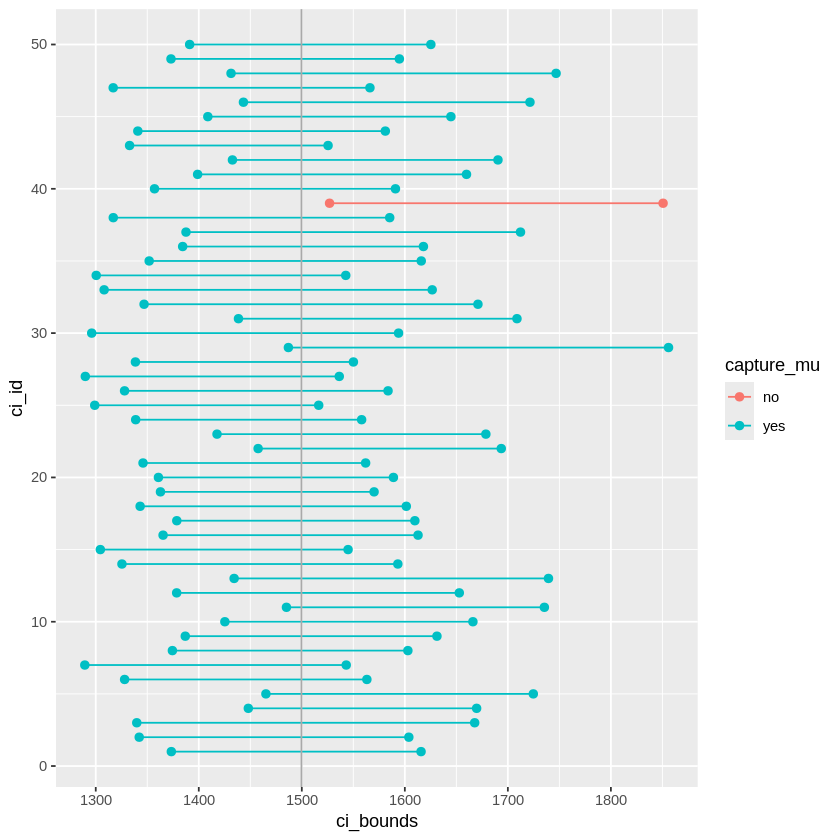

In [ ]:
#And finally we can create the plot using the following:

ggplot(data = ci_data, aes(x = ci_bounds, y = ci_id,
                           group = ci_id, color=capture_mu)) +
  geom_point(size=2) +
  geom_line() +
  geom_vline(xintercept = params$mu, color="darkgray")

<h4>Q4. What is the appropriate critical value for a 99% confidence level?</h4>

In [ ]:
z_star_99 <- qnorm(0.995)
z_star_95

[1] 1.959964

<h4>Q5. Calculate 50 confidence intervals at the 99% confidence level. You do not need to obtain new samples, simply calculate new intervals based on the 95% confidence interval endpoints you had already collected. Plot all intervals and calculate the proportion of intervals that include the true population mean.</h4>

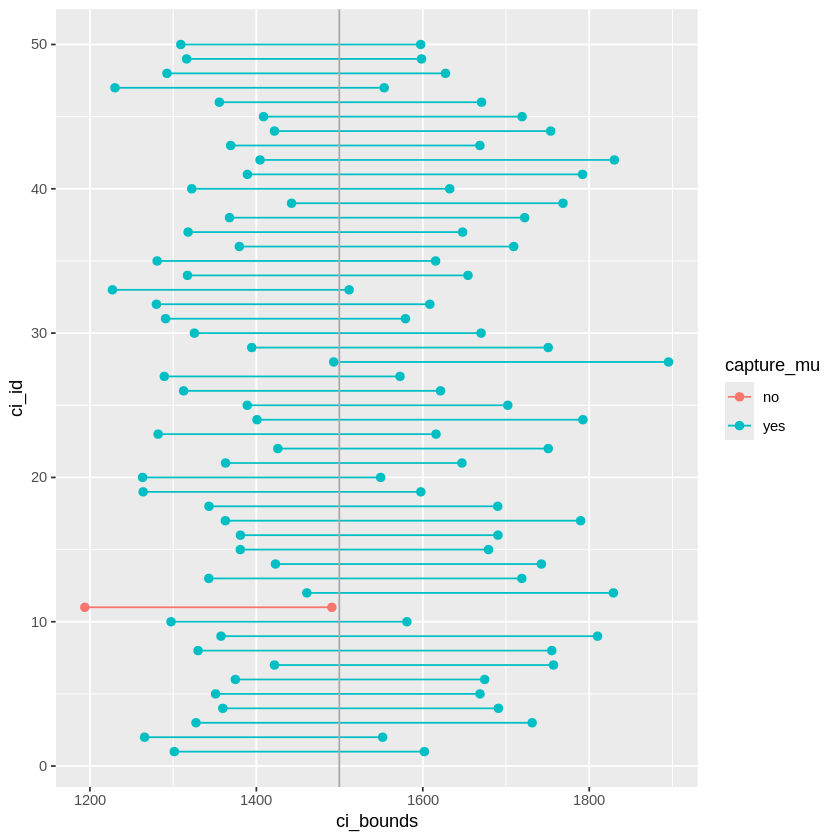

In [ ]:
#The proportion of intervals that include the true population mean

ci_99 <- ames %>%
        rep_sample_n(size = n, reps = 50, replace = TRUE) %>%
        summarise(lower = mean(area) - z_star_99 * (sd(area) / sqrt(n)),
                  upper = mean(area) + z_star_99 * (sd(area) / sqrt(n)))

ci_99 <- ci_99 %>%
  mutate(capture_mu = ifelse(lower < params$mu & upper > params$mu, "yes", "no"))

ci_data_99 <- data.frame(ci_id = c(1:50, 1:50),
                      ci_bounds = c(ci_99$lower, ci_99$upper),
                      capture_mu = c(ci_99$capture_mu, ci_99$capture_mu))

ggplot(data = ci_data_99, aes(x = ci_bounds, y = ci_id,
                           group = ci_id, color = capture_mu)) +
  geom_point(size = 2) +
  geom_line() +
  geom_vline(xintercept = params$mu, color = "darkgray")

<h1>LAB-3: Inference for numerical data</h1>

<h2>Load packages</h2>


In [4]:
library(statsr)
library(dplyr)
library(ggplot2)

Loading required package: BayesFactor

Loading required package: coda

Loading required package: Matrix

************
Welcome to BayesFactor 0.9.12-4.7. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




<h2>Load The data</h2>

In [5]:
data(nc)

In [6]:
#showing the few rows in a dataset

head(nc)

fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
<int>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>
NA,13,younger mom,39,full term,10,married,38,7.63,not low,male,nonsmoker,not white
NA,14,younger mom,42,full term,15,married,20,7.88,not low,male,nonsmoker,not white
19,15,younger mom,37,full term,11,married,38,6.63,not low,female,nonsmoker,white
21,15,younger mom,41,full term,6,married,34,8.00,not low,male,nonsmoker,white
NA,15,younger mom,39,full term,9,married,27,6.38,not low,female,nonsmoker,not white
NA,15,younger mom,38,full term,19,married,22,5.38,low,male,nonsmoker,not white


In [7]:
#printing the variables in a dataset
str(nc)

tibble [1,000 × 13] (S3: tbl_df/tbl/data.frame)
 $ fage          : int [1:1000] NA NA 19 21 NA NA 18 17 NA 20 ...
 $ mage          : int [1:1000] 13 14 15 15 15 15 15 15 16 16 ...
 $ mature        : Factor w/ 2 levels "mature mom","younger mom": 2 2 2 2 2 2 2 2 2 2 ...
 $ weeks         : int [1:1000] 39 42 37 41 39 38 37 35 38 37 ...
 $ premie        : Factor w/ 2 levels "full term","premie": 1 1 1 1 1 1 1 2 1 1 ...
 $ visits        : int [1:1000] 10 15 11 6 9 19 12 5 9 13 ...
 $ marital       : Factor w/ 2 levels "married","not married": 1 1 1 1 1 1 1 1 1 1 ...
 $ gained        : int [1:1000] 38 20 38 34 27 22 76 15 NA 52 ...
 $ weight        : num [1:1000] 7.63 7.88 6.63 8 6.38 5.38 8.44 4.69 8.81 6.94 ...
 $ lowbirthweight: Factor w/ 2 levels "low","not low": 2 2 2 2 2 1 2 1 2 2 ...
 $ gender        : Factor w/ 2 levels "female","male": 2 2 1 2 1 2 2 2 2 1 ...
 $ habit         : Factor w/ 2 levels "nonsmoker","smoker": 1 1 1 1 1 1 1 1 1 1 ...
 $ whitemom      : Factor w/ 2 levels "n

<h2>Exploratory data analysis</h2>

<p>We will first start with analyzing the weight gained by mothers throughout the pregnancy: gained.

Using visualization and summary statistics, describe the distribution of weight gained by mothers during pregnancy. The summary function can also be useful.</p>

<h4>Q1. How many mothers are we missing weight gain data from?</h4>

In [8]:
summary(nc$gained)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   20.00   30.00   30.33   38.00   85.00      27 

<h4>Q2. Make side-by-side boxplots of habit and weight. Which of the following is false about the relationship between habit and weight?</h4>

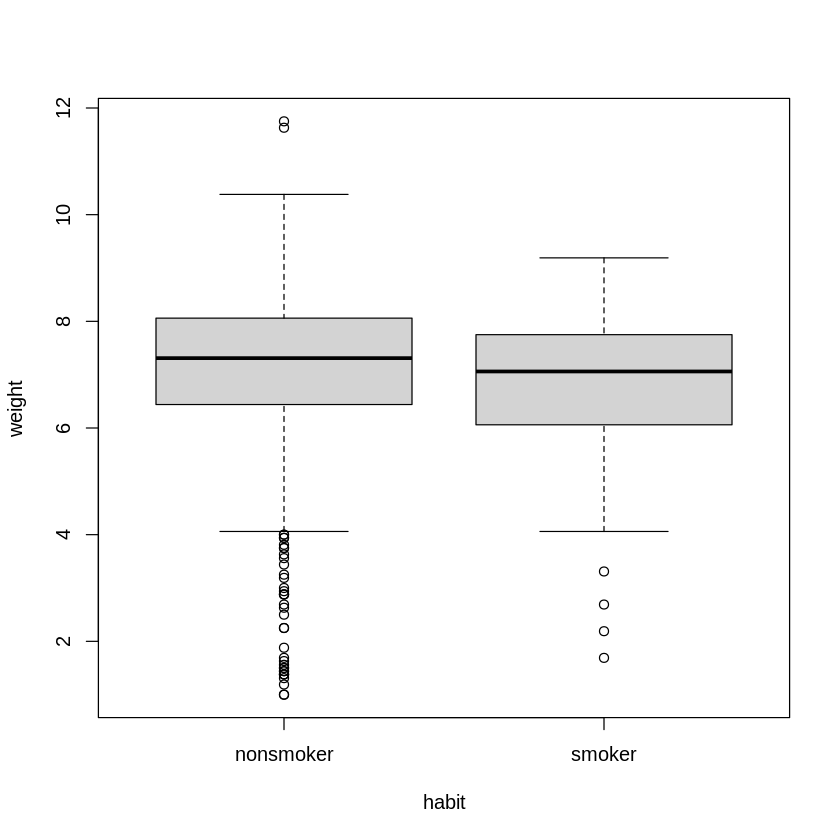

In [9]:
#consider the possible relationship between a mother’s smoking habit and the weight of her baby

boxplot(weight ~ habit, data =nc, xlab = "habit", ylab = "weight")

<p>The box plots show how the medians of the two distributions compare, but we can also compare the means of the distributions using the following to first group the data by the habit variable, and then calculate the mean weight in these groups using the mean function.</p>

In [10]:
nc %>%
  group_by(habit) %>%
  summarise(mean_weight = mean(weight))

habit,mean_weight
<fct>,<dbl>
nonsmoker,7.144273
smoker,6.828730
NA,3.630000


<h3>We can compare the two groups using the by() function together with the summary() function.

In [11]:
by(nc$weight, nc$habit, summary)

nc$habit: nonsmoker
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   6.440   7.310   7.144   8.060  11.750 
------------------------------------------------------------ 
nc$habit: smoker
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.690   6.077   7.060   6.829   7.735   9.190 

<h3>We could be interested in the stardard deviations and the IQR values, as well.</h3>

In [12]:
by(nc$weight, nc$habit, sd)

nc$habit: nonsmoker
[1] 1.518681
------------------------------------------------------------ 
nc$habit: smoker
[1] 1.38618

<h3>As expected by checking the summary, the IQRs of the distributions are roughly equal.</h3>

In [13]:
by(nc$weight, nc$habit, IQR)

nc$habit: nonsmoker
[1] 1.62
------------------------------------------------------------ 
nc$habit: smoker
[1] 1.6575

<h2>Inference</h2>

<h4>Q3. Are all conditions necessary for inference satisfied? Comment on each. You can compute the group sizes using the same by command above but replacing mean(weight) with n().</h4>

In [14]:
#Computing the group size.

nc %>%
  group_by(habit) %>%
  summarise(group_size = n())

habit,group_size
<fct>,<int>
nonsmoker,873
smoker,126
NA,1


<p>Next, we introduce a new function, inference, that we will use for conducting hypothesis tests and constructing confidence intervals.</p>

Response variable: numerical
Explanatory variable: categorical (2 levels) 
n_nonsmoker = 873, y_bar_nonsmoker = 7.1443, s_nonsmoker = 1.5187
n_smoker = 126, y_bar_smoker = 6.8287, s_smoker = 1.3862
H0: mu_nonsmoker =  mu_smoker
HA: mu_nonsmoker != mu_smoker
t = 2.359, df = 125
p_value = 0.0199

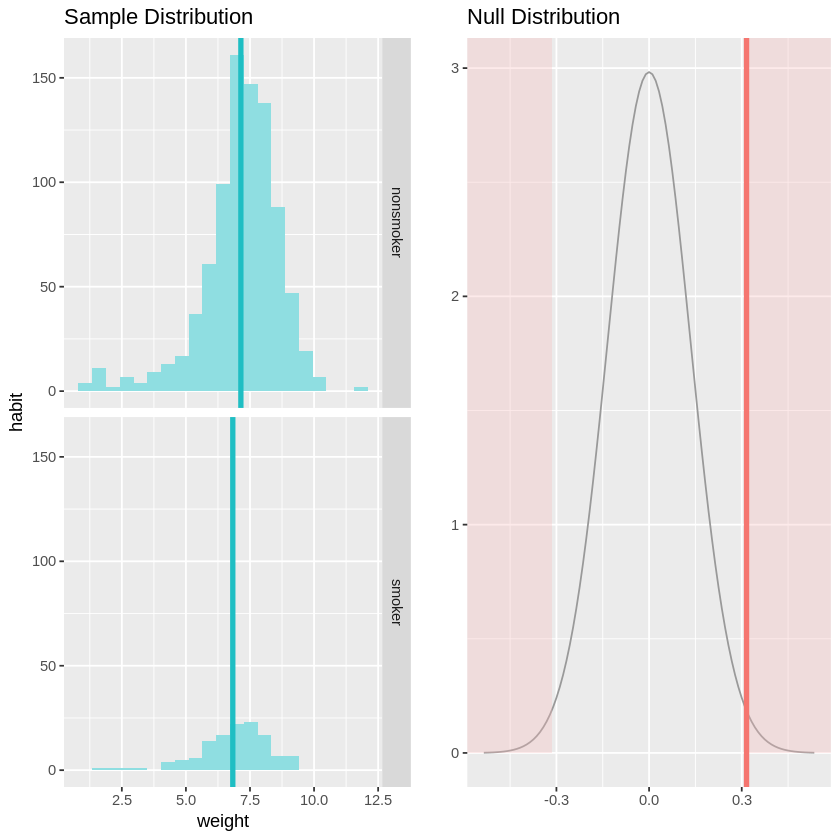

In [15]:
inference(y = weight, x=habit, data=nc, statistic="mean", type="ht", null=0,
          alternative="twosided", method="theoretical")

In [16]:
?inference

<h4>Q4. What is the conclusion of the hypothesis test?</h4>

Response variable: numerical, Explanatory variable: categorical (2 levels)
n_nonsmoker = 873, y_bar_nonsmoker = 7.1443, s_nonsmoker = 1.5187
n_smoker = 126, y_bar_smoker = 6.8287, s_smoker = 1.3862
95% CI (nonsmoker - smoker): (0.0508 , 0.5803)


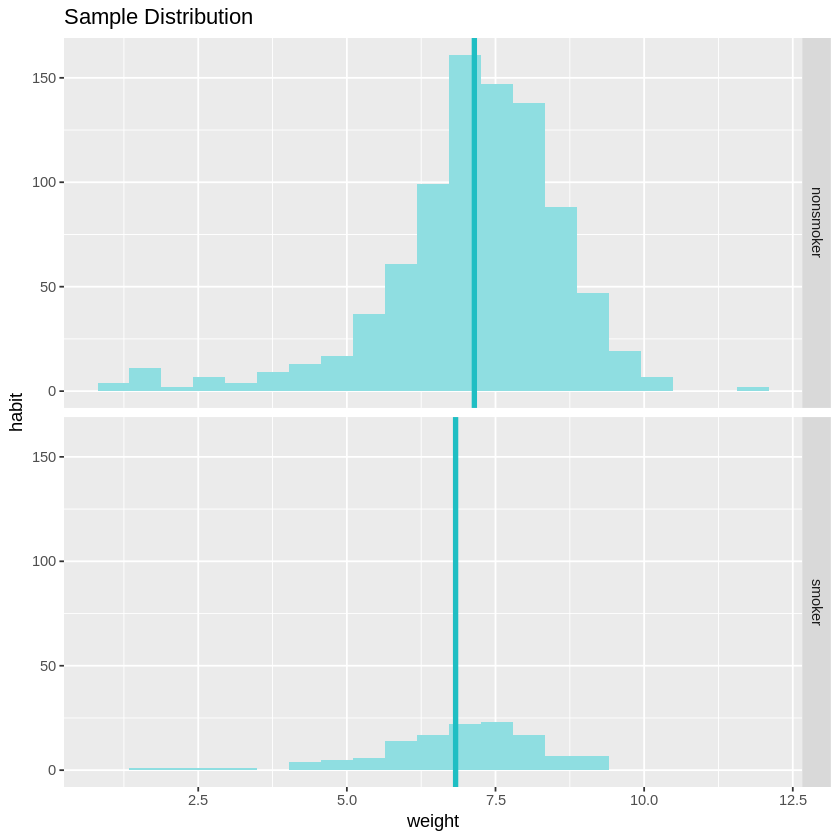

In [17]:
inference(y =weight, x=habit, data=nc, statistic="mean", type="ci", method="theoretical")

<p>By default the function reports an interval for (μnonsmoker−μsmoker
) . We can easily change this order by using the order argument:</p>

Response variable: numerical, Explanatory variable: categorical (2 levels)
n_smoker = 126, y_bar_smoker = 6.8287, s_smoker = 1.3862
n_nonsmoker = 873, y_bar_nonsmoker = 7.1443, s_nonsmoker = 1.5187
95% CI (smoker - nonsmoker): (-0.5803 , -0.0508)


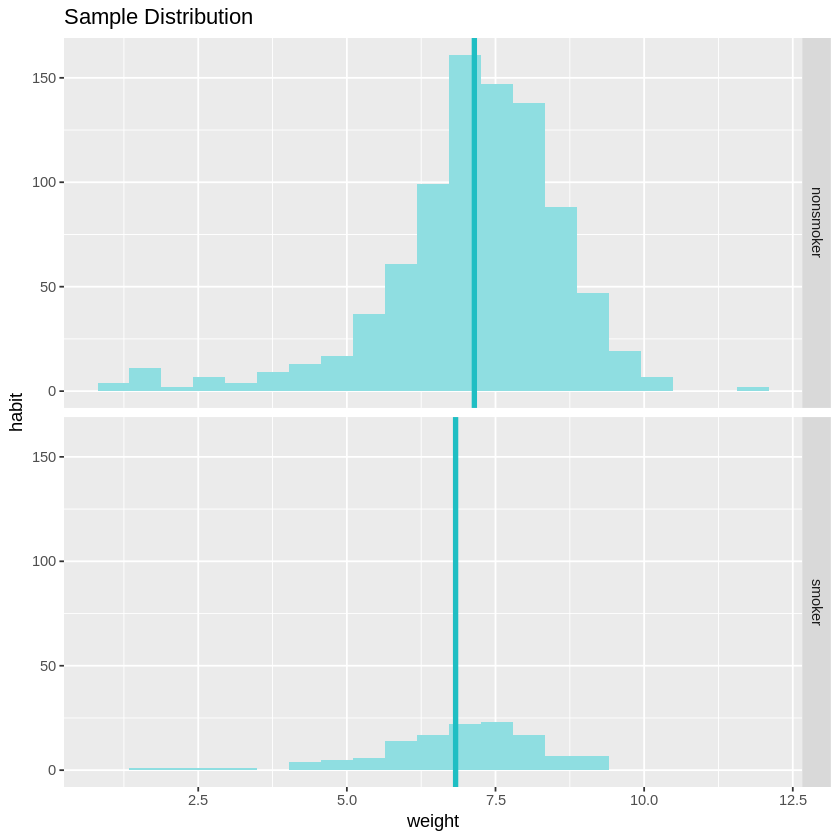

In [19]:
inference(y = weight, x= habit, data=nc, statistic = "mean", type="ci",
          method="theoretical", order = c("smoker","nonsmoker"))

<h4>Q5. Calculate a 99% confidence interval for the average length of pregnancies (weeks). Note that since you’re doing inference on a single population parameter, there is no explanatory variable, so you can omit the x variable from the function. Which of the following is the correct interpretation of this interval? </h4>

Single numerical variable
n = 998, y-bar = 38.3347, s = 2.9316
99% CI: (38.0952 , 38.5742)


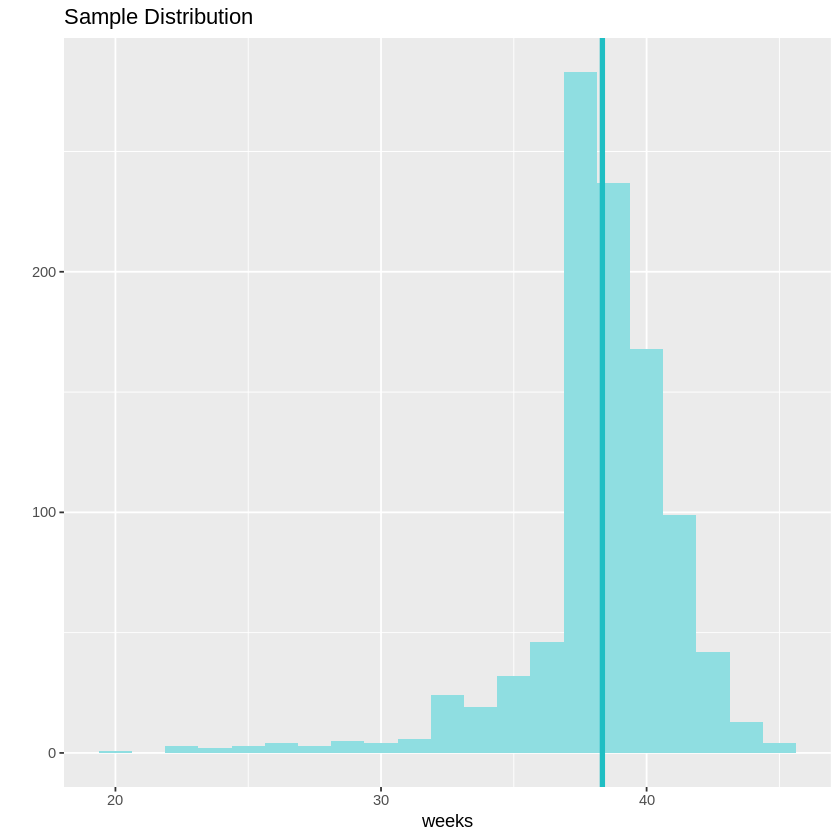

In [20]:
inference(y=weeks, data =nc, statistic = "mean", type="ci", conf_level = 0.99, method="theoretical")

<h4>Q6. Calculate a new confidence interval for the same parameter at the 90% confidence level. Comment on the width of this interval versus the one obtained in the the previous exercise.</h4>

Single numerical variable
n = 998, y-bar = 38.3347, s = 2.9316
90% CI: (38.1819 , 38.4874)


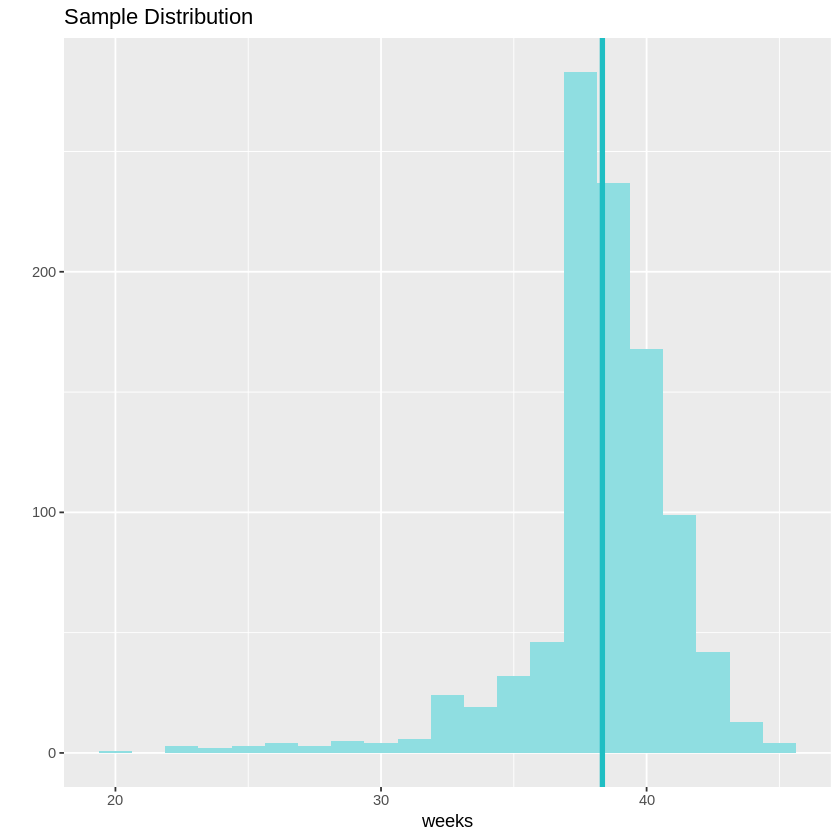

In [21]:
inference(y = weeks, data = nc, statistic = "mean", type = "ci", conf_level = 0.90 ,method = "theoretical")

<h4>Q7. Conduct a hypothesis test evaluating whether the average weight gained by younger mothers is different than the average weight gained by mature mothers.</h4>

Response variable: numerical
Explanatory variable: categorical (2 levels) 
n_mature mom = 129, y_bar_mature mom = 28.7907, s_mature mom = 13.4824
n_younger mom = 844, y_bar_younger mom = 30.5604, s_younger mom = 14.3469
H0: mu_mature mom =  mu_younger mom
HA: mu_mature mom != mu_younger mom
t = -1.3765, df = 128
p_value = 0.1711

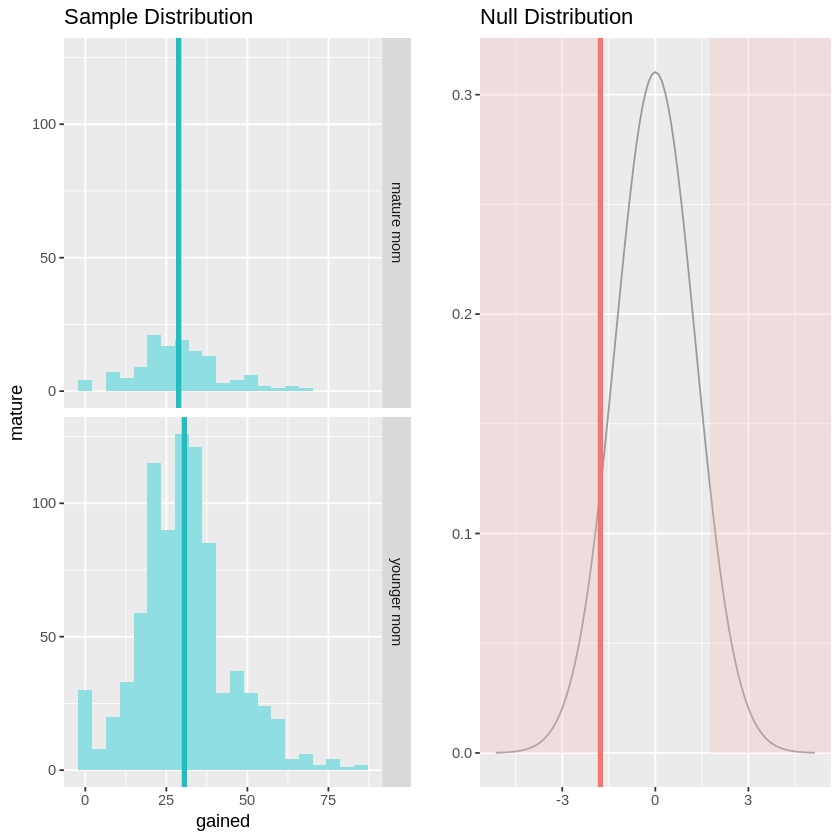

In [22]:
inference(x=mature, y=gained, data=nc, statistic = "mean", type = "ht", null=0,
          alternative="twoside", method="theoretical")

In [23]:
#calculate the t-test

t.test(gained ~ mature, data=nc, conf.level = 0.95)


	Welch Two Sample t-test

data:  gained by mature
t = -1.3765, df = 175.34, p-value = 0.1704
alternative hypothesis: true difference in means between group mature mom and group younger mom is not equal to 0
95 percent confidence interval:
 -4.3071463  0.7676886
sample estimates:
 mean in group mature mom mean in group younger mom 
                 28.79070                  30.56043 


<h4>Q8. Now, a non-inference task: Determine the age cutoff for younger and mature mothers. Use a method of your choice, and explain how your method works.</h4>

In [24]:
by(nc$mage, nc$mature, summary)

nc$mature: mature mom
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  35.00   35.00   37.00   37.18   38.00   50.00 
------------------------------------------------------------ 
nc$mature: younger mom
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.00   21.00   25.00   25.44   30.00   34.00 

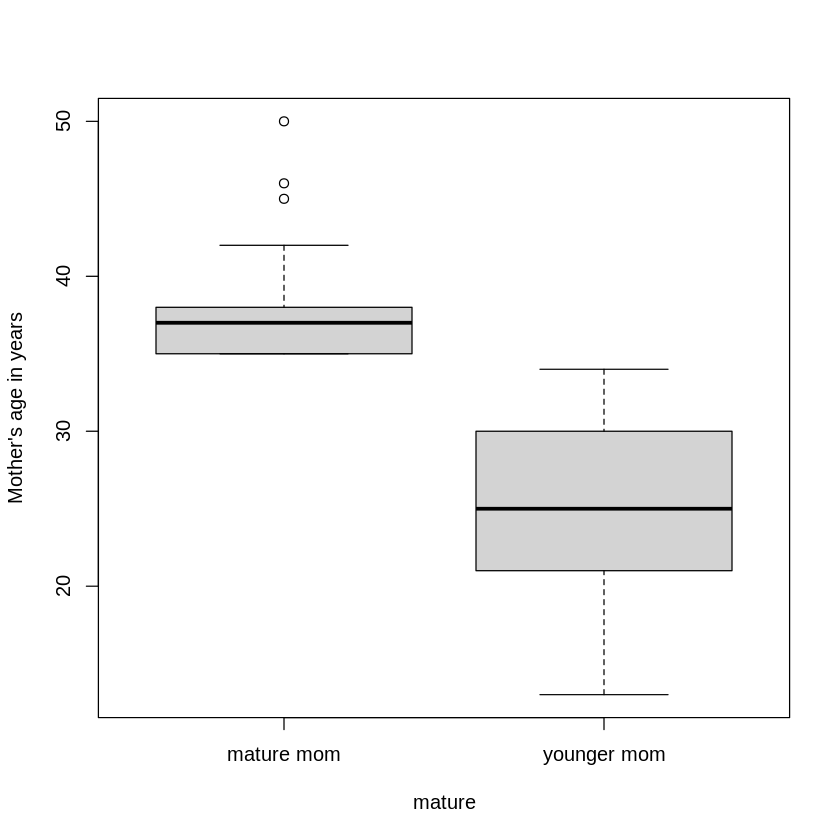

In [25]:
boxplot(mage ~ mature, data=nc, ylab="Mother's age in years")

<h4>Q9. Pick a pair of variables: one numerical (response) and one categorical (explanatory). Come up with a research question evaluating the relationship between these variables. Formulate the question in a way that it can be answered using a hypothesis test and/or a confidence interval. Answer your question using the inference function, report the statistical results, and also provide an explanation in plain language. Be sure to check all assumptions,state your α
 level, and conclude in context. (Note: Picking your own variables, coming up with a research question, and analyzing the data to answer this question is basically what you’ll need to do for your project as well.)</h4>

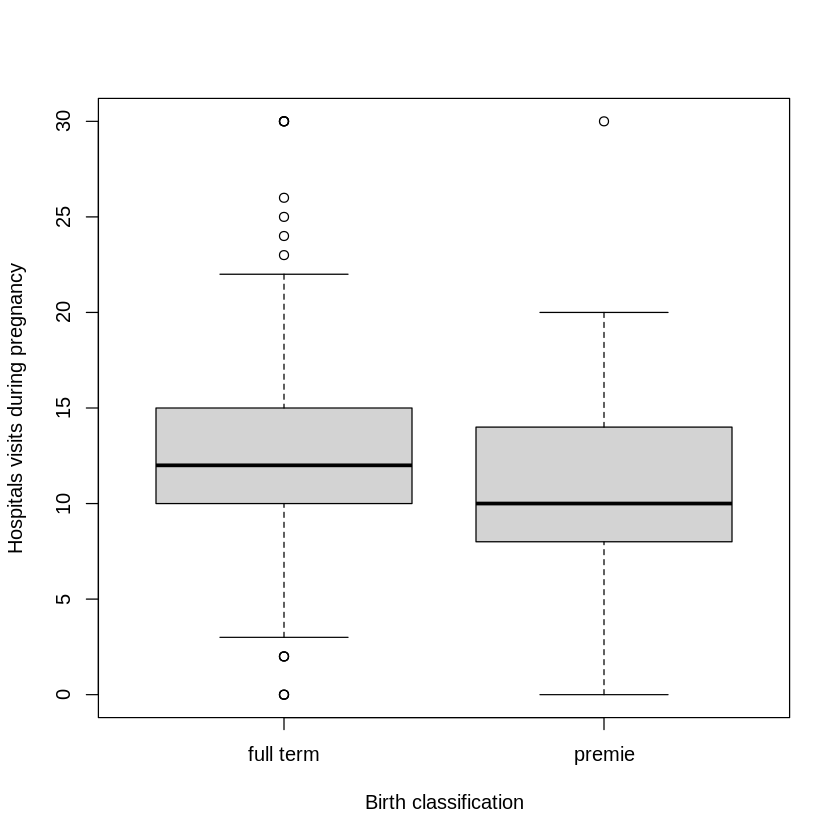

In [27]:
boxplot(visits ~ premie, data=nc, xlab ="Birth classification", ylab="Hospitals visits during pregnancy")

Response variable: numerical
Explanatory variable: categorical (2 levels) 
n_full term = 840, y_bar_full term = 12.3524, s_full term = 3.7515
n_premie = 150, y_bar_premie = 10.74, s_premie = 4.7323
H0: mu_full term =  mu_premie
HA: mu_full term > mu_premie
t = 3.9568, df = 149
p_value = 1e-04

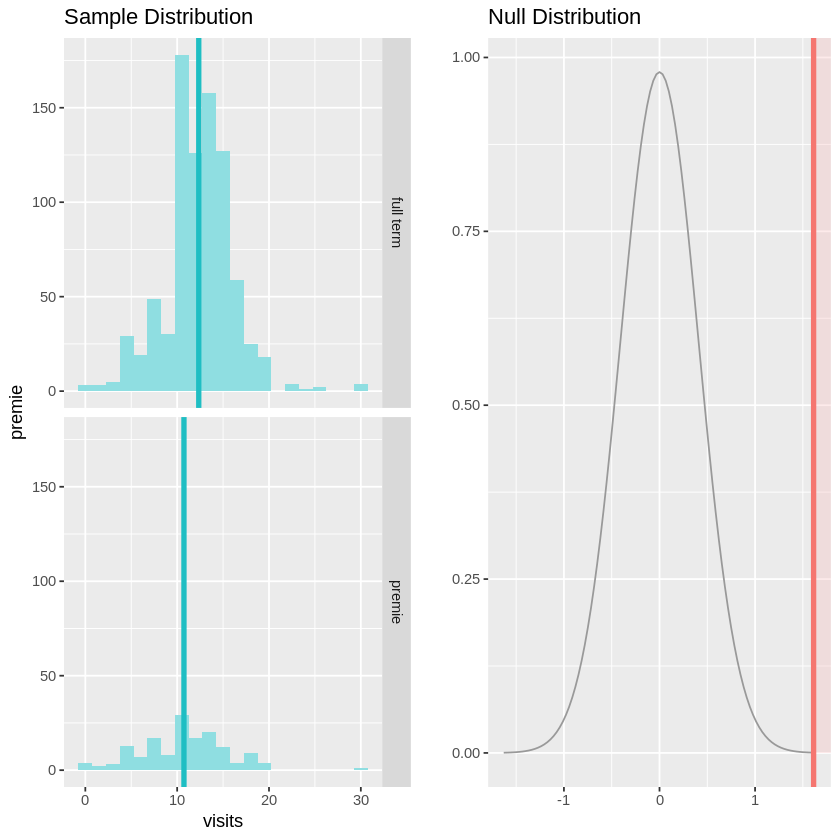

In [28]:
# calculating the inference

inference(y = visits, x = premie, data = nc, statistic = "mean", type = "ht", null = 0,
          alternative = "greater", method = "theoretical")

<p>We will conduct the hypothesis test:

H0:μfullterm=μpremie
; HA:μfullterm>μpremie
As the p-value is really small, we reject the null hypothesis (we suppose that a reasonable confidence level is greater than 0.0001). This means the data set provides statistically significant evidence that the number of hospital visits is, on average, greater for the full term births than the premature births.</p>

<h1>LAB-4 Inference for categorical data<h1>

<h2>Load packages</h2>

In [2]:
library(dplyr)
library(ggplot2)
library(statsr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: BayesFactor

Loading required package: coda

Loading required package: Matrix

************
Welcome to BayesFactor 0.9.12-4.7. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************



<h2> Load The Data<h2>

In [7]:
data(atheism)

In [8]:
head(atheism)

nationality,response,year
<fct>,<fct>,<int>
Afghanistan,non-atheist,2012
Afghanistan,non-atheist,2012
Afghanistan,non-atheist,2012
Afghanistan,non-atheist,2012
Afghanistan,non-atheist,2012
Afghanistan,non-atheist,2012


<p>Create a new dataframe called us12 that contains only the rows in atheism associated with respondents to the 2012 survey from the United States:</p>

In [9]:
us12 <- atheism %>%
  filter(nationality == "United States" , atheism$year =="2012")

In [10]:
us12

nationality,response,year
<fct>,<fct>,<int>
United States,non-atheist,2012
United States,non-atheist,2012
United States,non-atheist,2012
United States,non-atheist,2012
United States,non-atheist,2012
United States,non-atheist,2012
United States,non-atheist,2012
United States,non-atheist,2012
United States,non-atheist,2012


<h4>Q1. Calculate the proportion of atheist responses in the United States in 2012, i.e. in us12.</h4>

In [11]:
us12_tab <- table(us12$response)
us12_tab


    atheist non-atheist 
         50         952 

In [12]:
p_hat <- us12_tab[[1]]/us12_tab[[2]]
p_hat

[1] 0.05252101

<h2>Inference on proportions</h2>

<h4>Q2. Write out the conditions for inference to construct a 95% confidence interval for the proportion of atheists in the United States in 2012. Are you confident all conditions are met?</h4>


Single categorical variable, success: atheist
n = 1002, p-hat = 0.0499
95% CI: (0.0364 , 0.0634)


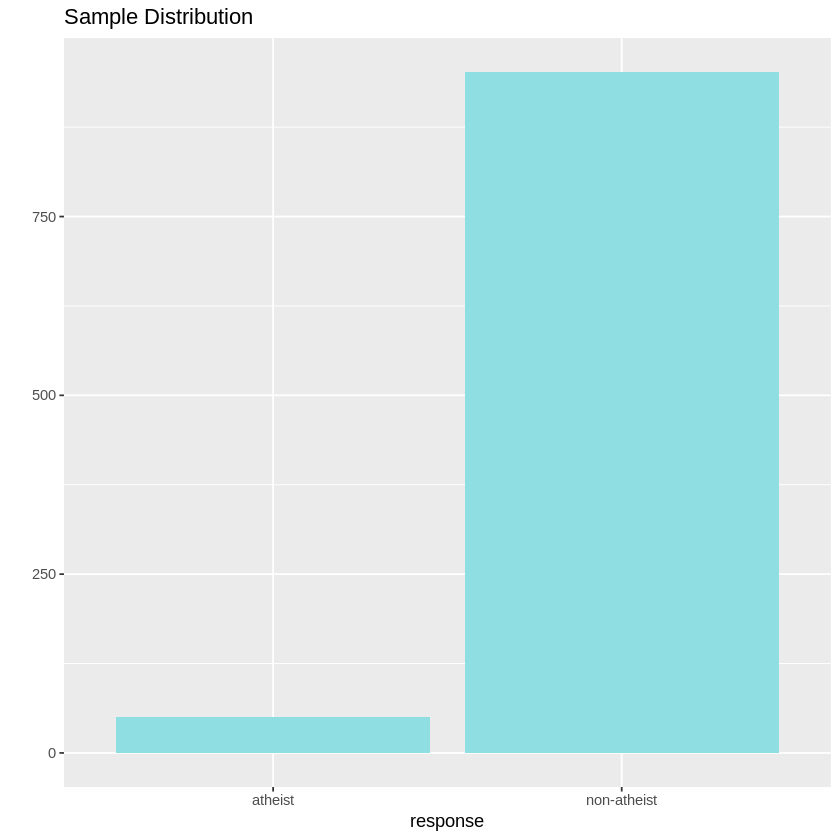

In [13]:
inference(y = response, data = us12, statistic = "proportion", type = "ci", method = "theoretical", success = "atheist")

<h4>Q3. Imagine that, after reading a front page story about the latest public opinion poll, a family member asks you, “What is a margin of error?” In one sentence, and ignoring the mechanics behind the calculation, how would you respond in a way that conveys the general concept?</h4>

In [14]:
n <- nrow(us12)
SE <- sqrt( p_hat *(1 - p_hat)/n  )
z_star <- qnorm(0.025, lower.tail = FALSE)
z_star*SE

[1] 0.01381229

<h4>Q4. Using the inference function, calculate confidence intervals for the proportion of atheists in 2012 in two other countries of your choice, and report the associated margins of error. Be sure to note whether the conditions for inference are met. It may be helpful to create new data sets for each of the two countries first, and then use these data sets in the inference function to construct the confidence intervals.</h4>

Single categorical variable, success: atheist
n = 2002, p-hat = 0.01
95% CI: (0.0056 , 0.0143)


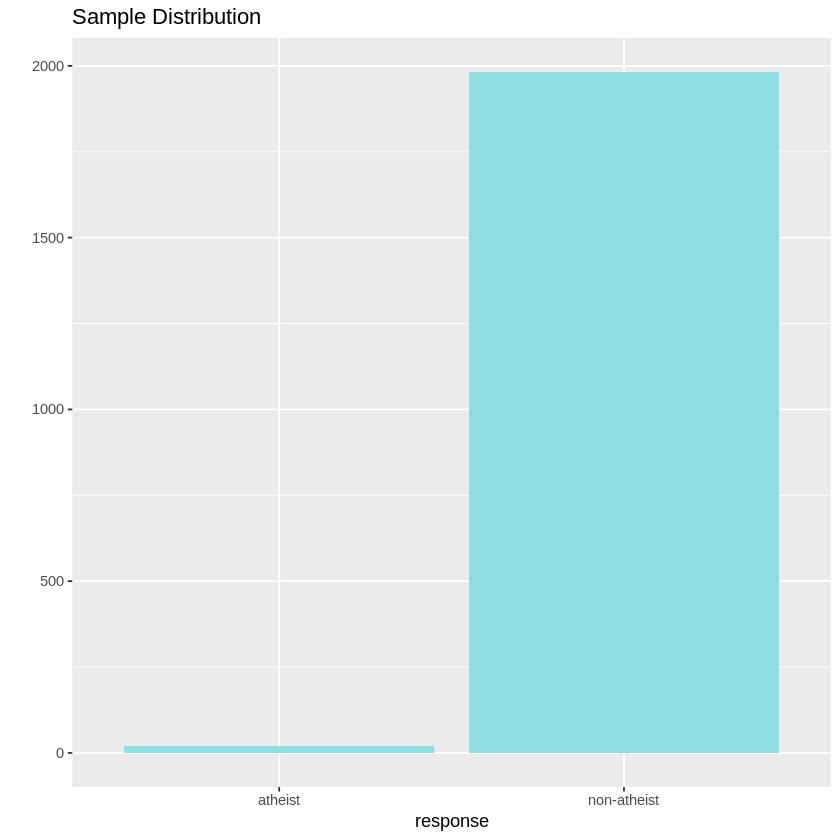

In [15]:
br12 <- atheism %>%
  filter(nationality == "Brazil" , atheism$year == "2012")

inference(y = response, data = br12, statistic = "proportion", type = "ci", method = "theoretical", success = "atheist")

Single categorical variable, success: atheist
n = 991, p-hat = 0.0706
95% CI: (0.0547 , 0.0866)


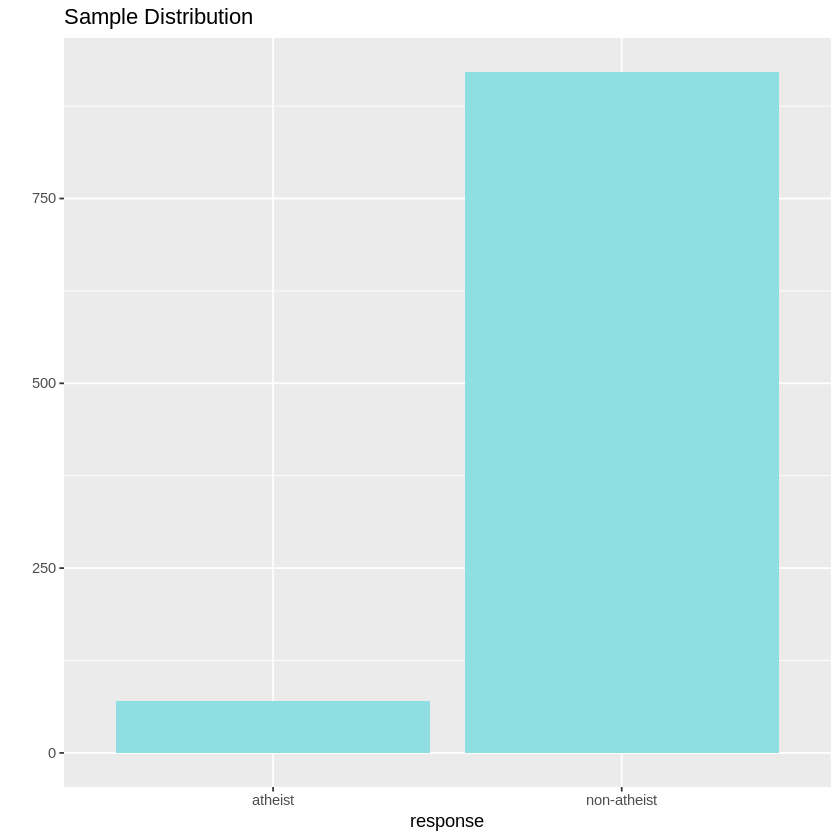

In [16]:
ar12 <- atheism %>%
  filter(nationality == "Argentina" , atheism$year == "2012")

inference(y = response, data = ar12, statistic = "proportion", type = "ci", method = "theoretical", success = "atheist")

<h2>How does the proportion affect the margin of error?</h2>

<p>Think back to the formula for the standard error: SE=p(1−p)/n−−−−−−−−−√
. This is then used in the formula for the margin of error for a 95% confidence interval: ME=1.96×SE=1.96×p(1−p)/n−−−−−−−−−√
. Since the population proportion p
 is in this ME
 formula, it should make sense that the margin of error is in some way dependent on the population proportion. We can visualize this relationship by creating a plot of ME
 vs. p
.</p>

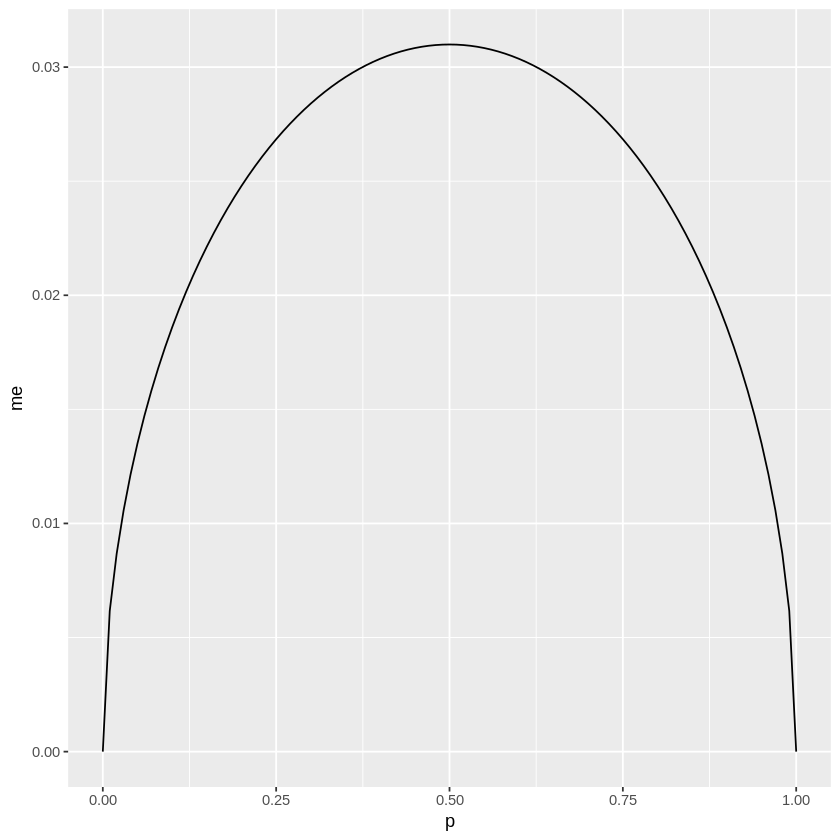

In [17]:
d <- data.frame(p <- seq(0, 1, 0.01))
n <- 1000
d <- d %>%
  mutate(me = 1.96*sqrt(p*(1 - p)/n))
ggplot(d, aes(x = p, y = me)) +
  geom_line()

<h4>Q5. There is convincing evidence that Spain has seen a change in its atheism index between 2005 and 2012.<h4>

Response variable: categorical (2 levels, success: atheist)
Explanatory variable: categorical (2 levels) 
n_2005 = 1146, p_hat_2005 = 0.1003
n_2012 = 1145, p_hat_2012 = 0.09
H0: p_2005 =  p_2012
HA: p_2005 != p_2012
z = 0.8476
p_value = 0.3966

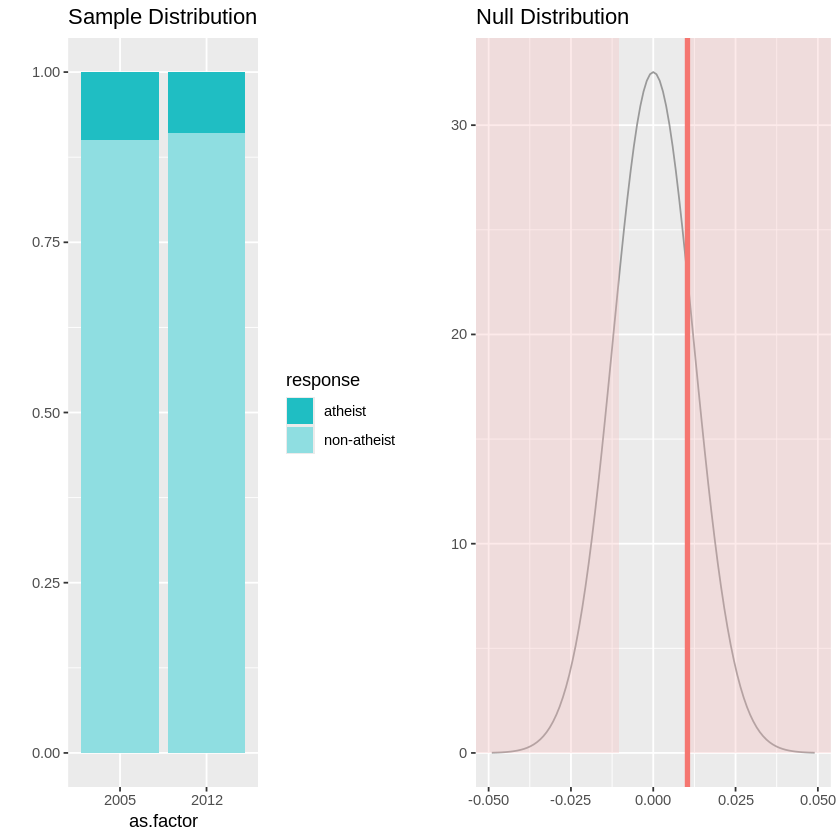

In [18]:
spain <- atheism %>%
  filter(nationality == "Spain")

inference(y = response, x = as.factor(year), data = spain, statistic = "proportion", type = "ht", null = 0, success = "atheist", alternative = "twosided", method = "theoretical")

<h4>Q6. There is convincing evidence that the United States has seen a change in its atheism index between 2005 and 2012</h4>

Response variable: categorical (2 levels, success: atheist)
Explanatory variable: categorical (2 levels) 
n_2005 = 1002, p_hat_2005 = 0.01
n_2012 = 1002, p_hat_2012 = 0.0499
H0: p_2005 =  p_2012
HA: p_2005 != p_2012
z = -5.2431
p_value = < 0.0001

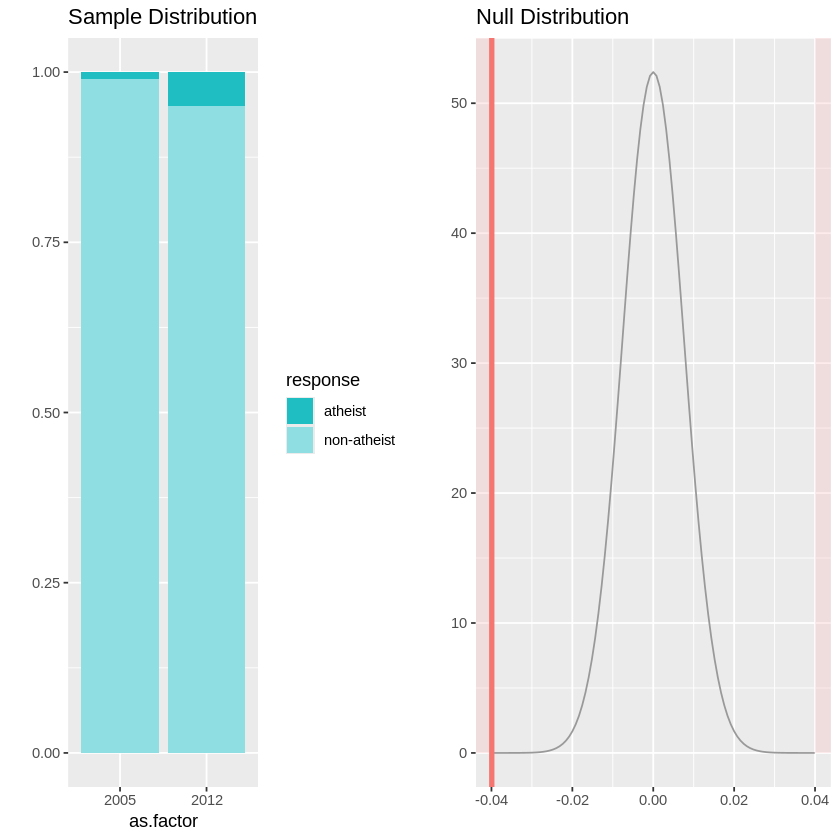

In [19]:
us <- atheism %>%
  filter(nationality == "United States")

inference(y = response, x = as.factor(year), data = us, statistic = "proportion", type = "ht", null = 0, success = "atheist", alternative = "twosided", method = "theoretical")

<h4>Q7. If in fact there has been no change in the atheism index in the countries listed in Table 4, in how many of those countries would you expect to detect a change (at a significance level of 0.05) simply by chance?</h4>

In [20]:
39*0.05

[1] 1.95

<h4>Q8. Suppose you’re hired by the local government to estimate the proportion of residents that attend a religious service on a weekly basis. According to the guidelines, the estimate must have a margin of error no greater than 1% with 95% confidence. You have no idea what to expect for p
. How many people would you have to sample to ensure that you are within the guidelines?</h4>

In [21]:
p_maxME = 0.5
z_star =  qnorm(0.025, lower.tail = FALSE)
ME = 0.01
n_min = z_star*z_star*p_maxME*(1-p_maxME)/(ME*ME)
n_min

[1] 9603.647